In [34]:
from pyexpat import features
import torch
from src.model import ToyNN
from src.generate_data import generate_batch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Параметры эксперимента



15it [00:43,  2.87s/it]


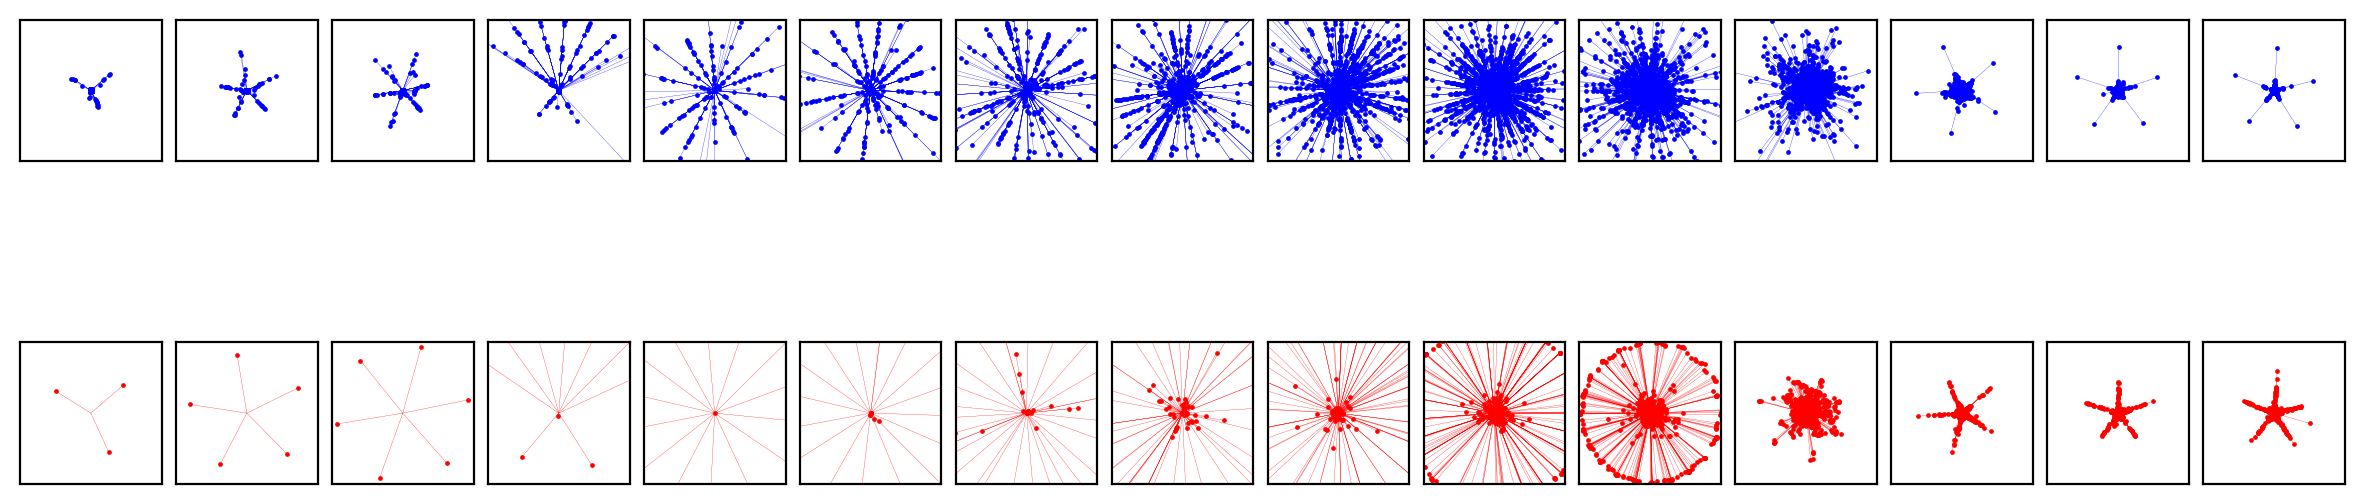

In [35]:
def _draw_in_ax(ax, array_2d: np.ndarray, color: str) -> None:
    ax.set_aspect('equal')
    ax.scatter(array_2d[:, 0], array_2d[:, 1], c=color, s=0.5)
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(len(array_2d)):
        ax.plot([array_2d[i, 0], 0], [array_2d[i, 1], 0], color=color, linewidth=0.1)

T = [3, 5, 6, 10, 15, 30, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000]
# T = [3, 5, 6]

fig, axs = plt.subplots(2, len(T), figsize=(len(T), 4))

for i, t in tqdm(enumerate(T)):
    checkpoint = torch.load(f'../checkpoints/checkpoint_{t}.pth', weights_only=False)
    model = ToyNN(input_dim=10_000, hidden_dim=2)
    model.load_state_dict(checkpoint['model'])

    features = model.W.cpu().detach().numpy()
    hiddens = checkpoint['hiddens']
    loss = checkpoint['loss']

    column = axs[:, i]

    _draw_in_ax(column[0], features, 'blue')
    _draw_in_ax(column[1], hiddens, 'red')

# fig.text(0.04, 0.5, 'Features\n(columns of W)', va='center', rotation='horizontal', fontsize=12)
# fig.text(0.04, 0.25, 'Training set\nHidden vectors', va='center', rotation='horizontal', fontsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()